Test new TBmodels - kwant interface
===================

In [1]:
import kwant
import tbmodels

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/home/greschd/.virtualenvs/tbmodels_kwant_test/lib/python3.5/site-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


Simple square lattice
---------------------

In [9]:
# Test - do simple square lattice 
model = tbmodels.Model(
    on_site=[1.3],
    dim=2,
    occ=0,
    pos=[[0., 0.]],
    uc = [[1, 0], [0, 1]]
)

t1 = 1.0
#for R in ([1,0],[0,1],[0,2],[0,3],[-2,4]): - throws an error 
for R in ([1,0],[0,1],[0,2],[0,3],[-2,4]):
    model.add_hop(t1*0, 0, 0, R)

In [10]:
kwant_sys = kwant.Builder()

In [11]:
latt = model.to_kwant_lattice()

In [12]:
def shape(pos):
    x, y = pos
    return -10 < x < 10 and -5 < y < 5

In [13]:
kwant_sys[latt.shape(shape, (0, 0))] = 0

In [14]:
model.add_hoppings_kwant(kwant_sys)

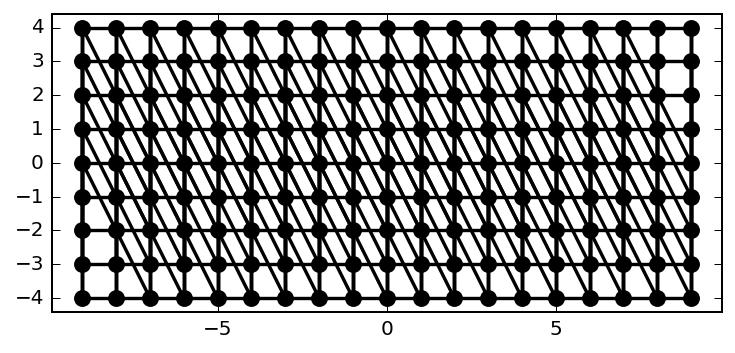

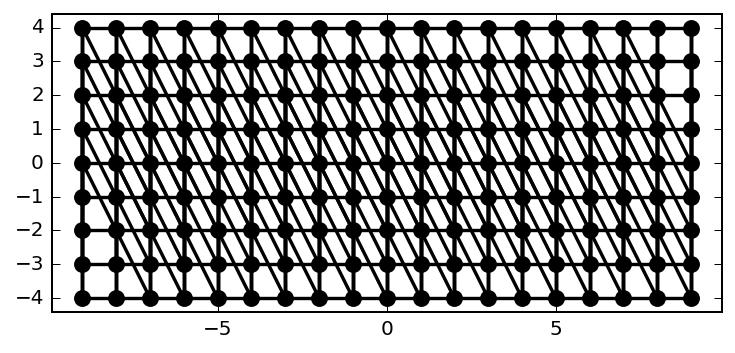

In [15]:
kwant.plot(kwant_sys)

Realistic tb model
--------------------

In [18]:
model2 = tbmodels.Model.from_hr_file('wannier90_hr.dat')

In [20]:
sys2 = kwant.Builder()
latt2 = model2.to_kwant_lattice()

In [23]:
def shape2(pos):
    x, y, z = pos
    return -10 < x < 10 and -5 < y < 5 and -5 < z < 5

In [25]:
sys2[latt2.shape(shape2, (0, 0, 0))] = 0

In [26]:
model2.add_hoppings_kwant(sys2)

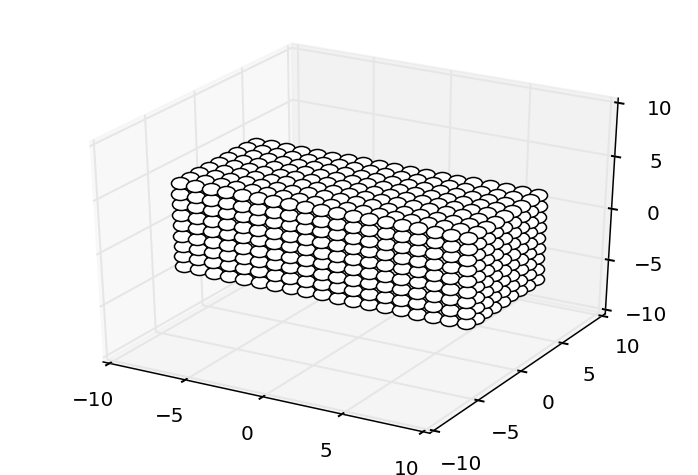

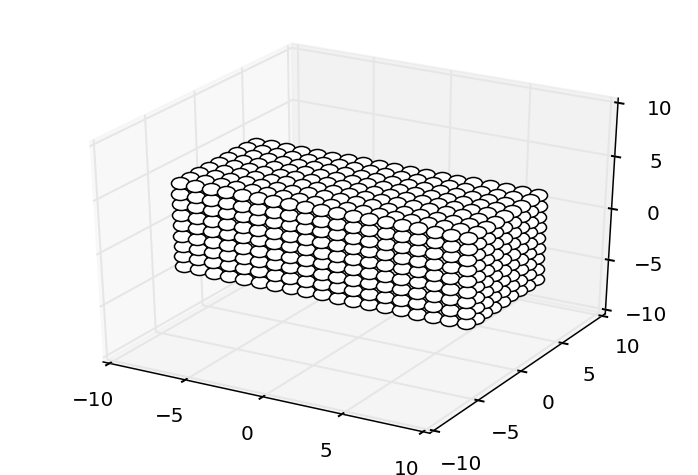

In [27]:
kwant.plot(sys2)